In [70]:
import pandas as pd
import matplotlib.pyplot as plt #Find the top 5 most profitable and 5 least profitable movies and visualize the results

In [71]:
# Load the uploaded Excel file
file_path = '../Project 4/cleaned_movie_data_fixed.csv'
data = pd.read_csv(file_path)


In [72]:
# Display the first few rows of the dataset to understand its structure
data.head()

,color,director_name,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,language,country,gross,budget,content_rating,profit
0,Color,Andrew Stanton,475,462.0,738,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,...,212204,1873,1.0,alien|american civil war|male nipple|mars|prin...,English,USA,73058679,263700000,PG-13,-190641321
1,Color,Robert Zemeckis,0,188.0,444,Tom Hanks,15000.0,Eddie Deezen,726.0,Peter Scolari,...,120798,16264,0.0,boy|christmas|christmas eve|north pole|train,English,USA,665426,165000000,G,-164334574
2,Color,Peter Berg,532,377.0,751,Liam Neeson,14000.0,Alexander Skarsgård,10000.0,Tadanobu Asano,...,202382,26679,0.0,box office flop|hawaii|naval|oahu hawaii|ship,English,USA,65173160,209000000,PG-13,-143826840
3,Color,Carl Rinsch,47,218.0,324,Keanu Reeves,18000.0,Cary-Hiroyuki Tagawa,1000.0,Jin Akanishi,...,116994,20965,2.0,box office flop|ronin|samurai|shogun|tournament,English,USA,38297305,175000000,PG-13,-136702695
4,Color,Bryan Singer,0,338.0,205,Eddie Marsan,979.0,Ewen Bremner,557.0,Ralph Brown,...,106416,1766,1.0,bean|giant|king|no opening credits|princess,English,USA,65171860,195000000,PG-13,-129828140


In [73]:
# Ensure that 'budget' and 'gross' columns are numeric, and convert if necessary
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['gross'] = pd.to_numeric(data['gross'], errors='coerce')

In [74]:
# Drop rows where 'budget' and 'gross' are missing, as they are critical for analysis
transformed_data = data.dropna(subset=['budget', 'gross'])

In [75]:
# Fill missing values for string columns like 'director_name' with 'Unknown'
transformed_data.fillna(value={'director_name': 'Unknown', 'actor_1_name': 'Unknown'})

,color,director_name,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,language,country,gross,budget,content_rating,profit
0,Color,Andrew Stanton,475,462.0,738,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,...,212204,1873,1.0,alien|american civil war|male nipple|mars|prin...,English,USA,73058679,263700000,PG-13,-190641321
1,Color,Robert Zemeckis,0,188.0,444,Tom Hanks,15000.0,Eddie Deezen,726.0,Peter Scolari,...,120798,16264,0.0,boy|christmas|christmas eve|north pole|train,English,USA,665426,165000000,G,-164334574
2,Color,Peter Berg,532,377.0,751,Liam Neeson,14000.0,Alexander Skarsgård,10000.0,Tadanobu Asano,...,202382,26679,0.0,box office flop|hawaii|naval|oahu hawaii|ship,English,USA,65173160,209000000,PG-13,-143826840
3,Color,Carl Rinsch,47,218.0,324,Keanu Reeves,18000.0,Cary-Hiroyuki Tagawa,1000.0,Jin Akanishi,...,116994,20965,2.0,box office flop|ronin|samurai|shogun|tournament,English,USA,38297305,175000000,PG-13,-136702695
4,Color,Bryan Singer,0,338.0,205,Eddie Marsan,979.0,Ewen Bremner,557.0,Ralph Brown,...,106416,1766,1.0,bean|giant|king|no opening credits|princess,English,USA,65171860,195000000,PG-13,-129828140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,Color,Steven Spielberg,14000,215.0,515,Henry Thomas,861.0,Dee Wallace,725.0,Peter Coyote,...,281842,2811,0.0,bicyclist|boy|doll|star wars reference|voice i...,English,USA,434949459,10500000,PG,424449459
3043,Color,George Lucas,0,282.0,1470,Harrison Ford,11000.0,Peter Cushing,1000.0,Kenny Baker,...,911097,13485,1.0,death star|empire|galactic war|princess|rebellion,English,USA,460935665,11000000,PG,449935665
3044,Color,James Cameron,0,315.0,2528,Leonardo DiCaprio,29000.0,Kate Winslet,14000.0,Gloria Stuart,...,793059,45223,0.0,artist|love|ship|titanic|wet,English,USA,658672302,200000000,PG-13,458672302
3045,Color,Colin Trevorrow,365,644.0,1290,Bryce Dallas Howard,3000.0,Judy Greer,2000.0,Omar Sy,...,418214,8458,0.0,dinosaur|disaster film|experiment gone wrong|j...,English,USA,652177271,150000000,PG-13,502177271


In [76]:
# Create a new column for profit
transformed_data['profit'] = transformed_data['gross'] - transformed_data['budget']

In [77]:
# Remove duplicate rows
transformed_data = transformed_data.drop_duplicates()

In [78]:
# Remove the last character 'Â' from the 'movie_title' column if it exists
transformed_data['movie_title'] = transformed_data['movie_title'].str.rstrip('Â')


In [79]:
# Clean the 'movie_title' column by removing 'Â' and any additional whitespace at the end
data['movie_title'] = data['movie_title'].str.replace('Â', '', regex=True).str.strip()

In [80]:
# Remove rows where 'movie_title' has duplicates (keep the first occurrence and drop others)
data_no_duplicates = data.drop_duplicates(subset=['movie_title'], keep='first')

In [81]:
# Display the cleaned and deduplicated data to verify the changes
data_no_duplicates[['movie_title']].head(), data_no_duplicates.shape

(             movie_title
 0            John Carter
 1      The Polar Express
 2             Battleship
 3               47 Ronin
 4  Jack the Giant Slayer,
 (2993, 27))

In [82]:
# Sorting the data by profit to find the top and bottom 5 movies
top_5_profitable = transformed_data.sort_values(by='profit', ascending=False).head(5)
bottom_5_profitable = transformed_data.sort_values(by='profit', ascending=True).head(5)

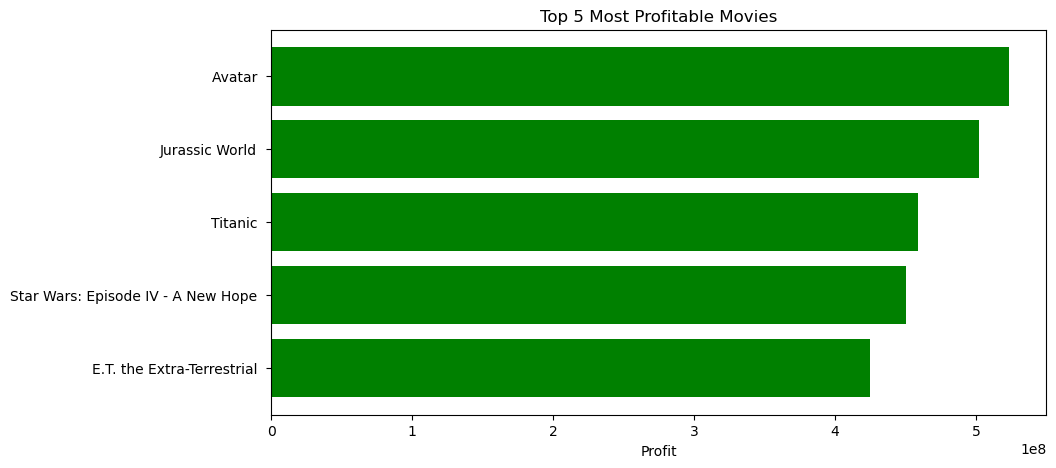

In [83]:
# Visualization: Plot the top 5 most profitable movies
plt.figure(figsize=(10, 5))
plt.barh(top_5_profitable['movie_title'], top_5_profitable['profit'], color='green')
plt.xlabel('Profit')
plt.title('Top 5 Most Profitable Movies')
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.show()

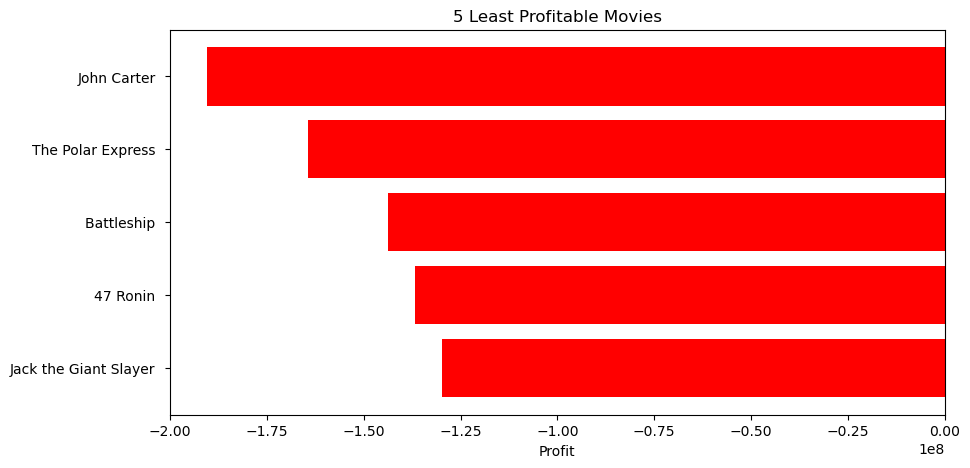

In [84]:
# Visualization: Plot the 5 least profitable movies
plt.figure(figsize=(10, 5))
plt.barh(bottom_5_profitable['movie_title'], bottom_5_profitable['profit'], color='red')
plt.xlabel('Profit')
plt.title('5 Least Profitable Movies')
plt.gca().invert_yaxis()  # Invert to show the lowest at the top
plt.show()

In [85]:
# Display the top 5 most profitable and 5 least profitable movies
print(top_5_profitable[['movie_title', 'profit']])
print(bottom_5_profitable[['movie_title', 'profit']])

                              movie_title     profit
3046                              Avatar   523505847
3045                      Jurassic World   502177271
3044                             Titanic   458672302
3043  Star Wars: Episode IV - A New Hope   449935665
3042          E.T. the Extra-Terrestrial   424449459
              movie_title     profit
0            John Carter  -190641321
1      The Polar Express  -164334574
2             Battleship  -143826840
3               47 Ronin  -136702695
4  Jack the Giant Slayer  -129828140


In [86]:
# Reset the index
transformed_data.reset_index(drop=True, inplace=True)

In [87]:
# Save the transformed data to a CSV file
output_file_path = '../Project 4/cleaned_movie_data_fixed.csv'
transformed_data.to_csv(output_file_path, index=False)

In [88]:
# Display the first few rows of the cleaned and transformed data
transformed_data.head()

,color,director_name,director_facebook_likes,num_critic_for_reviews,num_user_for_reviews,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,language,country,gross,budget,content_rating,profit
0,Color,Andrew Stanton,475,462.0,738,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,...,212204,1873,1.0,alien|american civil war|male nipple|mars|prin...,English,USA,73058679,263700000,PG-13,-190641321
1,Color,Robert Zemeckis,0,188.0,444,Tom Hanks,15000.0,Eddie Deezen,726.0,Peter Scolari,...,120798,16264,0.0,boy|christmas|christmas eve|north pole|train,English,USA,665426,165000000,G,-164334574
2,Color,Peter Berg,532,377.0,751,Liam Neeson,14000.0,Alexander Skarsgård,10000.0,Tadanobu Asano,...,202382,26679,0.0,box office flop|hawaii|naval|oahu hawaii|ship,English,USA,65173160,209000000,PG-13,-143826840
3,Color,Carl Rinsch,47,218.0,324,Keanu Reeves,18000.0,Cary-Hiroyuki Tagawa,1000.0,Jin Akanishi,...,116994,20965,2.0,box office flop|ronin|samurai|shogun|tournament,English,USA,38297305,175000000,PG-13,-136702695
4,Color,Bryan Singer,0,338.0,205,Eddie Marsan,979.0,Ewen Bremner,557.0,Ralph Brown,...,106416,1766,1.0,bean|giant|king|no opening credits|princess,English,USA,65171860,195000000,PG-13,-129828140
